In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [120]:
df = pd.read_csv('../datasets/data_with_classes_and_metros.csv')
df.drop(['Unnamed: 0'], inplace=True, axis=1)

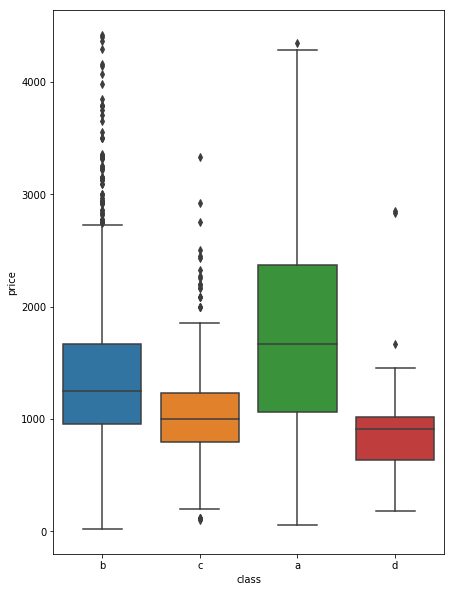

In [125]:
scaler = StandardScaler()
#df = scaler.fit_transform(df)
SIZE_CUT_VALUE = 700
PRICE_CUT_VALUE = 4500
plt.subplots(figsize=(7,10))
df = df[(df.price < PRICE_CUT_VALUE) & (df['size'] < SIZE_CUT_VALUE)]
sns.boxplot(x='class', y = 'price', data=df)

In [126]:
X = df.drop(['price'],axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 )

In [132]:
def base_line_predict(X_test, X_train, y_train, numeric_class = False):
    """
    Возвращает среднюю классу цену 
    """
    if numeric_class == True:
        a_mean = y_train.loc[X_train[X_train['class'] == 0].index].mean()
        b_mean = y_train.loc[X_train[X_train['class'] == 1].index].mean()
        c_mean = y_train.loc[X_train[X_train['class'] == 2].index].mean()
        d_mean = y_train.loc[X_train[X_train['class'] == 3].index].mean()
    else:
        a_mean = y_train.loc[X_train[X_train['class'] == 'a'].index].mean()
        b_mean = y_train.loc[X_train[X_train['class'] == 'b'].index].mean()
        c_mean = y_train.loc[X_train[X_train['class'] == 'c'].index].mean()
        d_mean = y_train.loc[X_train[X_train['class'] == 'd'].index].mean()
    y_pred = pd.Series(index = X_test.index)
    if numeric_class == True:
        y_pred.loc[X_test[X_test['class'] == 0].index] = a_mean
        y_pred.loc[X_test[X_test['class'] == 1].index] = b_mean
        y_pred.loc[X_test[X_test['class'] == 2].index] = c_mean
        y_pred.loc[X_test[X_test['class'] == 3].index] = d_mean
    else:
        y_pred.loc[X_test[X_test['class'] == 'a'].index] = a_mean
        y_pred.loc[X_test[X_test['class'] == 'b'].index] = b_mean
        y_pred.loc[X_test[X_test['class'] == 'c'].index] = c_mean
        y_pred.loc[X_test[X_test['class'] == 'd'].index] = d_mean
    return y_pred

In [131]:
mean_squared_error(y_pred=base_line_predict(X_test, X_train, y_train), y_true=y_test)

372073.01492074475